![表紙](https://www.oreilly.co.jp/books/images/picture978-4-87311-907-6.gif)

このノートブックはオライリー・ジャパンより発行の書籍[『セキュリティエンジニアのための機械学習』](https://www.oreilly.co.jp/books/9784873119076/)のサンプルコードです。コードの解説等は書籍をご参照ください。なお、このコードを動作させた結果について、著者およびオライリー・ジャパンは一切の責任を負いません。

In [ ]:
!wget https://the.earth.li/~sgtatham/putty/latest/w32/putty.exe -O pe

--2021-09-30 14:09:39--  https://the.earth.li/~sgtatham/putty/latest/w32/putty.exe
Resolving the.earth.li (the.earth.li)... 93.93.131.124, 2a00:1098:86:4d:c0ff:ee:15:900d
Connecting to the.earth.li (the.earth.li)|93.93.131.124|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://the.earth.li/~sgtatham/putty/0.76/w32/putty.exe [following]
--2021-09-30 14:09:39--  https://the.earth.li/~sgtatham/putty/0.76/w32/putty.exe
Reusing existing connection to the.earth.li:443.
HTTP request sent, awaiting response... 200 OK
Length: 1180904 (1.1M) [application/x-msdos-program]
Saving to: ‘pe’

pe                  100%[===================>]   1.13M  1.94MB/s    in 0.6s    

2021-09-30 14:09:40 (1.94 MB/s) - ‘pe’ saved [1180904/1180904]



In [ ]:
# liefの最新版だと、Colabがクラッシュすることがあるので 0.10.0を使用する
!pip install lief==0.10.0

     |████████████████████████████████| 3.5 MB 5.4 MB/s 


In [ ]:
!ls

pe  sample_data


In [ ]:
!pip install optuna

     |████████████████████████████████| 302 kB 5.3 MB/s 
     |████████████████████████████████| 208 kB 70.6 MB/s 
     |████████████████████████████████| 80 kB 9.3 MB/s 
     |████████████████████████████████| 75 kB 4.5 MB/s 
     |████████████████████████████████| 49 kB 5.0 MB/s 
     |████████████████████████████████| 111 kB 78.5 MB/s 
     |████████████████████████████████| 144 kB 79.7 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=d0186cfc716c3c558569c23525e116adf307c0cc000bec2f1e2c7d2a5974d7ed
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
import lief

# バイナリのロード
binary = lief.parse("pe")
# ヘッダ内のMajorLinkerVersionの取得と出力
MajorLinkerVersion = binary.optional_header.major_linker_version
print(MajorLinkerVersion)

# ヘッダ内のMinorLinkerVersionの取得と出力
MinorLinkerVersion = binary.optional_header.minor_linker_version
print(MinorLinkerVersion)

# ヘッダ内のNumberOfSectionsの取得と出力
NumberOfSections = binary.header.numberof_sections
print(NumberOfSections)

14
0
6


In [ ]:
#DebugSize, ImageVersion, IatRVA, ExportSize, ResourceSize,
#VirtualSize2, NumberOfSections

# ヘッダ内のDebugSizeの取得と出力
DebugSize = binary.data_directories[6].size
print("DebugSize: {}".format(DebugSize))

# ヘッダ内のImageVersionの取得と出力
ImageVersion = binary.optional_header.major_image_version
print("ImageVersion: {}".format(ImageVersion))

# ヘッダ内のIatRVAの取得と出力
IATRVA = binary.data_directories[12].rva
print("IatRVA: {}".format(IATRVA))

# ヘッダ内のExportSizeの取得と出力
ExportSize = binary.data_directories[0].size
print("ExportSize: {}".format(ExportSize))

# ヘッダ内のResourceSizeの取得と出力
ResSize = binary.data_directories[2].size
print("ResourceSize: {}".format(ResSize))

# ヘッダ内のVirtualSize2の取得と出力
VirtualSize2 = binary.sections[1].virtual_size
print("VirtualSize2: {}".format(VirtualSize2))

# ヘッダ内のDebugRVAの取得と出力
NumberOfSections = binary.header.numberof_sections
print("NumberOfSections: {}".format(NumberOfSections))


DebugSize: 0
ImageVersion: 0
IatRVA: 778996
ExportSize: 0
ResourceSize: 341792
VirtualSize2: 169468
NumberOfSections: 6


In [ ]:
import json

binary_json = lief.to_json(binary)
data = json.loads(binary_json)  
print(json.dumps(data, indent=4))

{
    "data_directories": [
        {
            "RVA": 0,
            "size": 0,
            "type": "EXPORT_TABLE"
        },
        {
            "RVA": 777480,
            "section": ".rdata",
            "size": 180,
            "type": "IMPORT_TABLE"
        },
        {
            "RVA": 811008,
            "section": ".rsrc",
            "size": 341792,
            "type": "RESOURCE_TABLE"
        },
        {
            "RVA": 0,
            "size": 0,
            "type": "EXCEPTION_TABLE"
        },
        {
            "RVA": 1161728,
            "section": ".reloc",
            "size": 19176,
            "type": "CERTIFICATE_TABLE"
        },
        {
            "RVA": 1155072,
            "section": ".reloc",
            "size": 31232,
            "type": "BASE_RELOCATION_TABLE"
        },
        {
            "RVA": 0,
            "size": 0,
            "type": "DEBUG"
        },
        {
            "RVA": 0,
            "size": 0,
            "type": "ARCHITECT

In [ ]:
!mkdir ember_data

In [ ]:
!wget https://ember.elastic.co/ember_dataset_2018_2.tar.bz2

--2021-09-30 14:09:51--  https://ember.elastic.co/ember_dataset_2018_2.tar.bz2
Resolving ember.elastic.co (ember.elastic.co)... 34.107.161.234, 2600:1901:0:1f6d::
Connecting to ember.elastic.co (ember.elastic.co)|34.107.161.234|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1696539273 (1.6G) [application/x-bzip2]
Saving to: ‘ember_dataset_2018_2.tar.bz2’

ember_dataset_2018_ 100%[===================>]   1.58G  63.5MB/s    in 28s     

2021-09-30 14:10:19 (58.5 MB/s) - ‘ember_dataset_2018_2.tar.bz2’ saved [1696539273/1696539273]



### EMBERデータセットの展開(１０分程度必要です)

In [ ]:
!tar jxf ember_dataset_2018_2.tar.bz2 -C ember_data

In [ ]:
!ls -lha ./ember_data/ember2018

total 9.4G
drwxrwsr-x 2 1004 users 4.0K Jul 29  2019 .
drwxr-xr-x 3 root root  4.0K Sep 30 14:10 ..
-rw-rw-r-- 1 1004 users 122M Jul 29  2019 ember_model_2018.txt
-rw-rw-r-- 1 1004 users 1.8G Jul 10  2019 test_features.jsonl
-rw-rw-r-- 1 1004 users 540M Jul 10  2019 train_features_0.jsonl
-rw-rw-r-- 1 1004 users 1.6G Jul 10  2019 train_features_1.jsonl
-rw-rw-r-- 1 1004 users 1.3G Jul 10  2019 train_features_2.jsonl
-rw-rw-r-- 1 1004 users 1.3G Jul 10  2019 train_features_3.jsonl
-rw-rw-r-- 1 1004 users 1.3G Jul 10  2019 train_features_4.jsonl
-rw-rw-r-- 1 1004 users 1.8G Jul 10  2019 train_features_5.jsonl


In [ ]:
!git clone https://github.com/endgameinc/ember

Cloning into 'ember'...
remote: Enumerating objects: 266, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 266 (delta 32), reused 45 (delta 14), pack-reused 192
Receiving objects: 100% (266/266), 11.36 MiB | 34.51 MiB/s, done.
Resolving deltas: 100% (113/113), done.


In [ ]:
!cat ./ember/ember/__init__.py

# -*- coding: utf-8 -*-

import os
import json
import tqdm
import numpy as np
import pandas as pd
import lightgbm as lgb
import multiprocessing
from .features import PEFeatureExtractor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import (roc_auc_score, make_scorer)


def raw_feature_iterator(file_paths):
    """
    Yield raw feature strings from the inputed file paths
    """
    for path in file_paths:
        with open(path, "r") as fin:
            for line in fin:
                yield line


def vectorize(irow, raw_features_string, X_path, y_path, extractor, nrows):
    """
    Vectorize a single sample of raw features and write to a large numpy file
    """
    raw_features = json.loads(raw_features_string)
    feature_vector = extractor.process_raw_features(raw_features)

    y = np.memmap(y_path, dtype=np.float32, mode="r+", shape=nrows)
    y[irow] = raw_features["label"]

    X = np.memmap(X_path, d

In [ ]:
%%writefile ./ember/ember/__init__.py
# -*- coding: utf-8 -*-

import os
import json
import tqdm
import numpy as np
import pandas as pd
import lightgbm as lgb
import multiprocessing
from .features import PEFeatureExtractor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import (roc_auc_score, make_scorer)


def raw_feature_iterator(file_paths):
    """
    Yield raw feature strings from the inputed file paths
    """
    for path in file_paths:
        with open(path, "r") as fin:
            for line in fin:
                yield line


def vectorize(irow, raw_features_string, X_path, y_path, extractor, nrows):
    """
    Vectorize a single sample of raw features and write to a large numpy file
    """
    raw_features = json.loads(raw_features_string)
    feature_vector = extractor.process_raw_features(raw_features)

    y = np.memmap(y_path, dtype=np.float32, mode="r+", shape=nrows)
    y[irow] = raw_features["label"]

    X = np.memmap(X_path, dtype=np.float32, mode="r+", shape=(nrows, extractor.dim))
    X[irow] = feature_vector


def vectorize_unpack(args):
    """
    Pass through function for unpacking vectorize arguments
    """
    return vectorize(*args)


def vectorize_subset(X_path, y_path, raw_feature_paths, extractor, nrows):
    """
    Vectorize a subset of data and write it to disk
    """
    # Create space on disk to write features to
    X = np.memmap(X_path, dtype=np.float32, mode="w+", shape=(nrows, extractor.dim))
    y = np.memmap(y_path, dtype=np.float32, mode="w+", shape=nrows)
    del X, y

    # Distribute the vectorization work
    pool = multiprocessing.Pool()
    argument_iterator = ((irow, raw_features_string, X_path, y_path, extractor, nrows)
                         for irow, raw_features_string in enumerate(raw_feature_iterator(raw_feature_paths)))
    for _ in tqdm.tqdm(pool.imap_unordered(vectorize_unpack, argument_iterator), total=nrows):
        pass


def create_vectorized_features(data_dir, feature_version=2):
    """
    Create feature vectors from raw features and write them to disk
    """
    extractor = PEFeatureExtractor(feature_version)

    print("Vectorizing training set")
    X_path = os.path.join(data_dir, "X_train.dat")
    y_path = os.path.join(data_dir, "y_train.dat")
    raw_feature_paths = [os.path.join(data_dir, "train_features_{}.jsonl".format(i)) for i in range(3)]
    nrows = sum([1 for fp in raw_feature_paths for line in open(fp)])
    vectorize_subset(X_path, y_path, raw_feature_paths, extractor, nrows)

    print("Vectorizing test set")
    X_path = os.path.join(data_dir, "X_test.dat")
    y_path = os.path.join(data_dir, "y_test.dat")
    raw_feature_paths = [os.path.join(data_dir, "test_features.jsonl")]
    nrows = sum([1 for fp in raw_feature_paths for line in open(fp)])
    vectorize_subset(X_path, y_path, raw_feature_paths, extractor, nrows)


def read_vectorized_features(data_dir, subset=None, feature_version=2):
    """
    Read vectorized features into memory mapped numpy arrays
    """
    if subset is not None and subset not in ["train", "test"]:
        return None

    extractor = PEFeatureExtractor(feature_version)
    ndim = extractor.dim
    X_train = None
    y_train = None
    X_test = None
    y_test = None

    if subset is None or subset == "train":
        X_train_path = os.path.join(data_dir, "X_train.dat")
        y_train_path = os.path.join(data_dir, "y_train.dat")
        y_train = np.memmap(y_train_path, dtype=np.float32, mode="r")
        N = y_train.shape[0]
        X_train = np.memmap(X_train_path, dtype=np.float32, mode="r", shape=(N, ndim))
        if subset == "train":
            return X_train, y_train

    if subset is None or subset == "test":
        X_test_path = os.path.join(data_dir, "X_test.dat")
        y_test_path = os.path.join(data_dir, "y_test.dat")
        y_test = np.memmap(y_test_path, dtype=np.float32, mode="r")
        N = y_test.shape[0]
        X_test = np.memmap(X_test_path, dtype=np.float32, mode="r", shape=(N, ndim))
        if subset == "test":
            return X_test, y_test

    return X_train, y_train, X_test, y_test


def read_metadata_record(raw_features_string):
    """
    Decode a raw features string and return the metadata fields
    """
    all_data = json.loads(raw_features_string)
    metadata_keys = {"sha256", "appeared", "label", "avclass"}
    return {k: all_data[k] for k in all_data.keys() & metadata_keys}


def create_metadata(data_dir):
    """
    Write metadata to a csv file and return its dataframe
    """
    pool = multiprocessing.Pool()

    train_feature_paths = [os.path.join(data_dir, "train_features_{}.jsonl".format(i)) for i in range(6)]
    train_records = list(pool.imap(read_metadata_record, raw_feature_iterator(train_feature_paths)))
    train_records = [dict(record, **{"subset": "train"}) for record in train_records]

    test_feature_paths = [os.path.join(data_dir, "test_features.jsonl")]
    test_records = list(pool.imap(read_metadata_record, raw_feature_iterator(test_feature_paths)))
    test_records = [dict(record, **{"subset": "test"}) for record in test_records]

    all_metadata_keys = ["sha256", "appeared", "subset", "label", "avclass"]
    ordered_metadata_keys = [k for k in all_metadata_keys if k in train_records[0].keys()]
    metadf = pd.DataFrame(train_records + test_records)[ordered_metadata_keys]
    metadf.to_csv(os.path.join(data_dir, "metadata.csv"))
    return metadf


def read_metadata(data_dir):
    """
    Read an already created metadata file and return its dataframe
    """
    return pd.read_csv(os.path.join(data_dir, "metadata.csv"), index_col=0)


def optimize_model(data_dir):
    """
    Run a grid search to find the best LightGBM parameters
    """
    # Read data
    X_train, y_train = read_vectorized_features(data_dir, subset="train")

    # Filter unlabeled data
    train_rows = (y_train != -1)

    # read training dataset
    X_train = X_train[train_rows]
    y_train = y_train[train_rows]

    # score by roc auc
    # we're interested in low FPR rates, so we'll consider only the AUC for FPRs in [0,5e-3]
    score = make_scorer(roc_auc_score, max_fpr=5e-3)

    # define search grid
    param_grid = {
        'boosting_type': ['gbdt'],
        'objective': ['binary'],
        'num_iterations': [500, 1000],
        'learning_rate': [0.005, 0.05],
        'num_leaves': [512, 1024, 2048],
        'feature_fraction': [0.5, 0.8, 1.0],
        'bagging_fraction': [0.5, 0.8, 1.0]
    }
    model = lgb.LGBMClassifier(boosting_type="gbdt", n_jobs=-1, silent=True)

    # each row in X_train appears in chronological order of "appeared"
    # so this works for progrssive time series splitting
    progressive_cv = TimeSeriesSplit(n_splits=3).split(X_train)

    grid = GridSearchCV(estimator=model, cv=progressive_cv, param_grid=param_grid, scoring=score, n_jobs=1, verbose=4)
    grid.fit(X_train, y_train)

    return grid.best_params_


def train_model(data_dir, params={}, feature_version=2):
    """
    Train the LightGBM model from the EMBER dataset from the vectorized features
    """
    # update params
    params.update({"application": "binary"})

    # Read data
    X_train, y_train = read_vectorized_features(data_dir, "train", feature_version)

    # Filter unlabeled data
    train_rows = (y_train != -1)

    # Train
    lgbm_dataset = lgb.Dataset(X_train[train_rows], y_train[train_rows])
    lgbm_model = lgb.train(params, lgbm_dataset)

    return lgbm_model


def predict_sample(lgbm_model, file_data, feature_version=2):
    """
    Predict a PE file with an LightGBM model
    """
    extractor = PEFeatureExtractor(feature_version)
    features = np.array(extractor.feature_vector(file_data), dtype=np.float32)
    return lgbm_model.predict([features])[0]

Overwriting ./ember/ember/__init__.py


In [ ]:
%cd ./ember
!pip install -r requirements.txt
!python setup.py install

/content/ember
running install
running bdist_egg
running egg_info
creating ember.egg-info
writing ember.egg-info/PKG-INFO
writing dependency_links to ember.egg-info/dependency_links.txt
writing requirements to ember.egg-info/requires.txt
writing top-level names to ember.egg-info/top_level.txt
writing manifest file 'ember.egg-info/SOURCES.txt'
adding license file 'LICENSE.txt'
writing manifest file 'ember.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/ember
copying ember/features.py -> build/lib/ember
copying ember/__init__.py -> build/lib/ember
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/ember
copying build/lib/ember/features.py -> build/bdist.linux-x86_64/egg/ember
copying build/lib/ember/__init__.py -> build/bdist.linux-x86_64/egg/ember
byte-compiling build/bdist.linux-x86_64/egg/ember/features.py to

In [ ]:
%cd ..

/content


### データセットのベクトル化

In [ ]:
from ember import ember
ember.create_vectorized_features("./ember_data/ember2018")

Vectorizing training set


100%|██████████| 336049/336049 [00:48<00:00, 6924.43it/s]


Vectorizing test set


100%|██████████| 200000/200000 [00:28<00:00, 6954.60it/s]


In [ ]:
# 訓練用のデータとテスト用のデータをロード
X_train, y_train, X_test, y_test = ember.read_vectorized_features("./ember_data/ember2018/")
# ラベリングされていないデータを除外
train_rows = (y_train != -1)
X_train = X_train[train_rows]
y_train = y_train[train_rows]

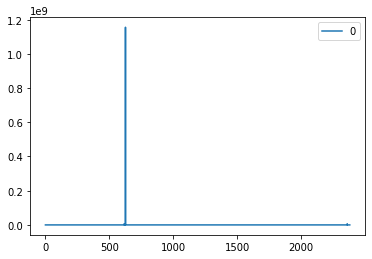

In [ ]:
import numpy as np
import pandas as pd    
import matplotlib.pyplot as plt

orig_data = pd.DataFrame(X_train[6,:])
orig_data.plot()

In [ ]:
from sklearn.preprocessing import StandardScaler
# 訓練用とテスト用の特徴量を標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle
pickle.dump(X_train, open('/content/drive/MyDrive/X_train.pkl','wb'))
pickle.dump(X_test, open('/content/drive/MyDrive/X_test.pkl','wb'))
pickle.dump(y_train, open('/content/drive/MyDrive/y_train.pkl','wb'))
pickle.dump(y_test, open('/content/drive/MyDrive/y_test.pkl','wb'))
pickle.dump(scaler, open('/content/drive/MyDrive/scaler.pkl','wb'))

In [ ]:
import pickle
X_train = pickle.load(open('/content/drive/MyDrive/X_train.pkl','rb'))
X_test = pickle.load(open('/content/drive/MyDrive/X_test.pkl','rb'))
y_train = pickle.load(open('/content/drive/MyDrive/y_train.pkl','rb'))
y_test = pickle.load(open('/content/drive/MyDrive/y_test.pkl','rb'))
scaler = pickle.load(open('/content/drive/MyDrive/scaler.pkl','rb'))

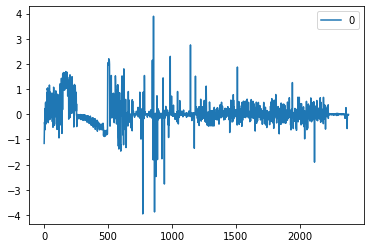

In [ ]:
import numpy as np
import pandas as pd    
import matplotlib.pyplot as plt

scaled_data = pd.DataFrame(X_train[6,:])
scaled_data.plot()

In [ ]:
!pip install optuna

In [ ]:
from keras.backend import clear_session
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import gc
import optuna

def Objective(trial):
    # データのコピー
    X_train_copy = np.copy(X_train)
    y_train_copy = np.copy(y_train)

    # モデルの作成と、パラメータ探索の設定
    model = Sequential()
    model.add(Dense(2048, activation='relu', input_dim=2381))
    model.add(Dense(1024, activation='relu'))
    # ドロップアウトの設定
    dropout_rate = trial.suggest_uniform('dropout_rate', 0, 0.5)
    model.add(Dropout(rate=dropout_rate))
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(
        learning_rate=trial.suggest_loguniform(
            "learning_rate", 1e-5, 1e-1),
        beta_1=trial.suggest_uniform("beta_1", 0.0, 1.0),
        beta_2=trial.suggest_uniform("beta_2", 0.0, 1.0)
        )
    model.compile(
        loss='binary_crossentropy',
        optimizer=optimizer, metrics=['accuracy']
        )
    history = model.fit(
        X_train_copy,
        y_train_copy,
        batch_size=512,
        epochs=5,
        validation_split=0.2
        )

    eval_value = 1 - history.history["val_accuracy"][-1]

    # 訓練データの削除とメモリの開放
    clear_session()
    del model, optimizer, history, X_train_copy, y_train_copy
    gc.collect()

    return eval_value

study = optuna.create_study()
study.optimize(Objective, n_trials=3, timeout=1200)
print('Best params:', study.best_params)

[I 2021-09-30 14:36:03,491] A new study created in memory with name: no-name-6b5ea2d1-45d9-4756-adfe-169b622d8231


Epoch 1/5
406/406 [==============================] - 15s 35ms/step - loss: 646.4899 - accuracy: 0.5911 - val_loss: 2.0874 - val_accuracy: 0.4836
Epoch 2/5
406/406 [==============================] - 14s 35ms/step - loss: 0.6769 - accuracy: 0.5959 - val_loss: 2.9199 - val_accuracy: 0.4837
Epoch 3/5
406/406 [==============================] - 15s 36ms/step - loss: 9.2903 - accuracy: 0.5959 - val_loss: 54.7488 - val_accuracy: 0.4828
Epoch 4/5
406/406 [==============================] - 14s 35ms/step - loss: 13.7763 - accuracy: 0.5958 - val_loss: 1.3341 - val_accuracy: 0.4836
Epoch 5/5
406/406 [==============================] - 14s 35ms/step - loss: 2.7561 - accuracy: 0.5959 - val_loss: 1.1389 - val_accuracy: 0.4837


[I 2021-09-30 14:37:18,235] Trial 0 finished with value: 0.5163290500640869 and parameters: {'dropout_rate': 0.4927780872111703, 'learning_rate': 0.0514167189354843, 'beta_1': 0.9055133509080336, 'beta_2': 0.9100819741798496}. Best is trial 0 with value: 0.5163290500640869.


Epoch 1/5
406/406 [==============================] - 15s 37ms/step - loss: 0.2857 - accuracy: 0.8778 - val_loss: 0.2428 - val_accuracy: 0.9134
Epoch 2/5
406/406 [==============================] - 14s 36ms/step - loss: 0.1722 - accuracy: 0.9324 - val_loss: 0.2042 - val_accuracy: 0.9265
Epoch 3/5
406/406 [==============================] - 14s 35ms/step - loss: 0.1445 - accuracy: 0.9445 - val_loss: 0.1842 - val_accuracy: 0.9324
Epoch 4/5
406/406 [==============================] - 15s 36ms/step - loss: 0.1257 - accuracy: 0.9523 - val_loss: 0.1769 - val_accuracy: 0.9330
Epoch 5/5
406/406 [==============================] - 14s 36ms/step - loss: 0.1124 - accuracy: 0.9581 - val_loss: 0.1685 - val_accuracy: 0.9384


[I 2021-09-30 14:38:32,556] Trial 1 finished with value: 0.06156128644943237 and parameters: {'dropout_rate': 0.20166054098442449, 'learning_rate': 1.5463200493869622e-05, 'beta_1': 0.3328657719683108, 'beta_2': 0.8577588675494868}. Best is trial 1 with value: 0.06156128644943237.


Epoch 1/5
406/406 [==============================] - 15s 36ms/step - loss: 3013.4910 - accuracy: 0.5939 - val_loss: 0.7453 - val_accuracy: 0.4837
Epoch 2/5
406/406 [==============================] - 14s 35ms/step - loss: 0.9883 - accuracy: 0.5982 - val_loss: 0.7101 - val_accuracy: 0.4837
Epoch 3/5
406/406 [==============================] - 14s 35ms/step - loss: 0.7279 - accuracy: 0.5957 - val_loss: 0.7283 - val_accuracy: 0.4837
Epoch 4/5
406/406 [==============================] - 14s 35ms/step - loss: 0.6760 - accuracy: 0.5959 - val_loss: 0.7162 - val_accuracy: 0.4837
Epoch 5/5
406/406 [==============================] - 14s 35ms/step - loss: 0.6751 - accuracy: 0.5959 - val_loss: 0.7165 - val_accuracy: 0.4837


[I 2021-09-30 14:39:45,635] Trial 2 finished with value: 0.5163290500640869 and parameters: {'dropout_rate': 0.23947241211206516, 'learning_rate': 0.08049162282133246, 'beta_1': 0.23074356147192365, 'beta_2': 0.3587827410766974}. Best is trial 1 with value: 0.06156128644943237.


Best params: {'dropout_rate': 0.20166054098442449, 'learning_rate': 1.5463200493869622e-05, 'beta_1': 0.3328657719683108, 'beta_2': 0.8577588675494868}


In [ ]:
from sklearn.model_selection import KFold, cross_validate
from keras.backend import clear_session
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier

def buildmodel():
    estimator = Sequential()
    estimator.add(Dense(2048, activation='relu', input_dim=2381))
    estimator.add(Dense(1024, activation='relu'))

    estimator.add(Dropout(rate=study.best_params['dropout_rate']))
    estimator.add(Dense(1024, activation='relu'))
    estimator.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(
        learning_rate = study.best_params['learning_rate'],
        beta_1 = study.best_params['beta_1'],
        beta_2 = study.best_params['beta_2']
    )
    estimator.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return(estimator)

In [ ]:
estimator = KerasClassifier(
    buildmodel,
    epochs=5,
    batch_size=256,
    verbose=1
    )
results = cross_validate(estimator, X_train, y_train, cv=5)
print('Test accuracy: ', results['test_score'].mean())

Epoch 1/5
812/812 [==============================] - 22s 26ms/step - loss: 0.2225 - accuracy: 0.9140
Epoch 2/5
812/812 [==============================] - 22s 27ms/step - loss: 0.1360 - accuracy: 0.9490
Epoch 3/5
812/812 [==============================] - 27s 33ms/step - loss: 0.1051 - accuracy: 0.9600
Epoch 4/5
812/812 [==============================] - 23s 28ms/step - loss: 0.0903 - accuracy: 0.9659
Epoch 5/5
203/203 [==============================] - 2s 10ms/step - loss: 0.1021 - accuracy: 0.9736
Epoch 1/5
812/812 [==============================] - 24s 29ms/step - loss: 0.1987 - accuracy: 0.9272
Epoch 2/5
812/812 [==============================] - 23s 29ms/step - loss: 0.1276 - accuracy: 0.9556
Epoch 3/5
812/812 [==============================] - 23s 29ms/step - loss: 0.0930 - accuracy: 0.9653
Epoch 4/5
812/812 [==============================] - 23s 28ms/step - loss: 0.0796 - accuracy: 0.9702
Epoch 5/5
203/203 [==============================] - 2s 11ms/step - loss: 0.1784 - accuracy:

In [ ]:
clear_session()
del estimator, results
gc.collect()


12583

In [ ]:
estimator = buildmodel()
estimator.fit(X_train, y_train, epochs=10, batch_size=128)
estimator.save('/content/drive/MyDrive/detect_malware_model.h5')

Epoch 1/10
2029/2029 [==============================] - 47s 23ms/step - loss: 0.1845 - accuracy: 0.9311
Epoch 2/10
2029/2029 [==============================] - 47s 23ms/step - loss: 0.1300 - accuracy: 0.9547
Epoch 3/10
2029/2029 [==============================] - 48s 24ms/step - loss: 0.1036 - accuracy: 0.9618
Epoch 4/10
2029/2029 [==============================] - 49s 24ms/step - loss: 0.0911 - accuracy: 0.9658
Epoch 5/10
2029/2029 [==============================] - 49s 24ms/step - loss: 0.0824 - accuracy: 0.9694
Epoch 6/10
2029/2029 [==============================] - 50s 25ms/step - loss: 0.0773 - accuracy: 0.9711
Epoch 7/10
2029/2029 [==============================] - 49s 24ms/step - loss: 0.0753 - accuracy: 0.9722
Epoch 8/10
2029/2029 [==============================] - 49s 24ms/step - loss: 0.0734 - accuracy: 0.9739
Epoch 9/10
2029/2029 [==============================] - 49s 24ms/step - loss: 0.0668 - accuracy: 0.9753
Epoch 10/10
2029/2029 [==============================] - 47s 23m

In [ ]:
from tensorflow.python.keras.models import load_model

estimator = load_model('/content/drive/MyDrive/detect_malware_model.h5')

In [ ]:
!ls

drive  ember  ember_data  ember_dataset_2018_2.tar.bz2	pe  sample_data


In [ ]:
!wget https://the.earth.li/~sgtatham/putty/latest/w32/putty.exe

--2021-09-04 04:07:19--  https://the.earth.li/~sgtatham/putty/latest/w32/putty.exe
Resolving the.earth.li (the.earth.li)... 93.93.131.124, 2a00:1098:86:4d:c0ff:ee:15:900d
Connecting to the.earth.li (the.earth.li)|93.93.131.124|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://the.earth.li/~sgtatham/putty/0.76/w32/putty.exe [following]
--2021-09-04 04:07:20--  https://the.earth.li/~sgtatham/putty/0.76/w32/putty.exe
Reusing existing connection to the.earth.li:443.
HTTP request sent, awaiting response... 200 OK
Length: 1180904 (1.1M) [application/x-msdos-program]
Saving to: ‘putty.exe’

putty.exe           100%[===================>]   1.13M  1.95MB/s    in 0.6s    

2021-09-04 04:07:21 (1.95 MB/s) - ‘putty.exe’ saved [1180904/1180904]



In [ ]:
!wget https://github.com/InQuest/malware-samples/blob/master/2019-02-Trickbot/374ef83de2b254c4970b830bb93a1dd79955945d24b824a0b35636e14355fe05?raw=true -O trickbot

--2021-09-04 04:07:21--  https://github.com/InQuest/malware-samples/blob/master/2019-02-Trickbot/374ef83de2b254c4970b830bb93a1dd79955945d24b824a0b35636e14355fe05?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/InQuest/malware-samples/raw/master/2019-02-Trickbot/374ef83de2b254c4970b830bb93a1dd79955945d24b824a0b35636e14355fe05 [following]
--2021-09-04 04:07:21--  https://github.com/InQuest/malware-samples/raw/master/2019-02-Trickbot/374ef83de2b254c4970b830bb93a1dd79955945d24b824a0b35636e14355fe05
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/InQuest/malware-samples/master/2019-02-Trickbot/374ef83de2b254c4970b830bb93a1dd79955945d24b824a0b35636e14355fe05 [following]
--2021-09-04 04:07:21--  https://raw.githubusercontent.com/InQuest/malware

In [ ]:
import numpy as np
from ember import ember

sample_data = open("putty.exe", "rb").read()
extractor = ember.PEFeatureExtractor(2)
sample_data = np.array(
    extractor.feature_vector(sample_data),
    dtype=np.float32
    ).reshape(1,-1)
sample_data = scaler.transform(sample_data)

pred = (estimator.predict(sample_data)> 0.5).astype("int32")

if pred:
    print("malware!")
else:
    print("benign file!")

benign file!


In [ ]:
!wget https://github.com/oreilly-japan/ml-security-jp/raw/master/ch04/putty.npy

--2021-09-04 04:07:22--  https://github.com/oreilly-japan/ml-security-jp/raw/master/ch04/putty.npy
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/oreilly-japan/ml-security-jp/master/ch04/putty.npy [following]
--2021-09-04 04:07:23--  https://raw.githubusercontent.com/oreilly-japan/ml-security-jp/master/ch04/putty.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9652 (9.4K) [application/octet-stream]
Saving to: ‘putty.npy’

putty.npy           100%[===================>]   9.43K  --.-KB/s    in 0s      

2021-09-04 04:07:23 (64.7 MB/s) - ‘putty.npy’ saved [9652/9652]



In [ ]:
import numpy as np

sample_data = np.load("putty.npy").reshape(1, -1)
feature_putty = scaler.transform(sample_data)

In [ ]:
pred = (estimator.predict(feature_putty)> 0.5).astype("int32")
if pred:
    print("malware!")
else:
    print("benign file!")

benign file!


In [ ]:
import numpy as np

sample_data = open("trickbot", "rb").read()
extractor = ember.PEFeatureExtractor(2)
sample_data = np.array(
    extractor.feature_vector(sample_data),
    dtype=np.float32).reshape(1,-1)
sample_data = scaler.transform(sample_data)

pred = (estimator.predict(sample_data)> 0.5).astype("int32")
if pred:
    print("malware!")
else:
    print("benign file!")

malware!


In [ ]:
!wget https://github.com/oreilly-japan/ml-security-jp/raw/master/ch04/trickbot.npy

--2021-09-04 04:07:23--  https://github.com/oreilly-japan/ml-security-jp/raw/master/ch04/trickbot.npy
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/oreilly-japan/ml-security-jp/master/ch04/trickbot.npy [following]
--2021-09-04 04:07:24--  https://raw.githubusercontent.com/oreilly-japan/ml-security-jp/master/ch04/trickbot.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9652 (9.4K) [application/octet-stream]
Saving to: ‘trickbot.npy’

trickbot.npy        100%[===================>]   9.43K  --.-KB/s    in 0s      

2021-09-04 04:07:24 (88.3 MB/s) - ‘trickbot.npy’ saved [9652/9652]



In [ ]:
import numpy as np

sample_data = np.load("trickbot.npy").reshape(1, -1)
feature_trickbot = scaler.transform(sample_data)

pred = (estimator.predict(feature_trickbot)> 0.5).astype("int32")
if pred:
    print("malware!")
else:
    print("benign file!")

malware!


## CNNによるマルウェア検知

In [ ]:
!wget https://the.earth.li/~sgtatham/putty/latest/w32/putty.exe

--2021-09-04 04:07:24--  https://the.earth.li/~sgtatham/putty/latest/w32/putty.exe
Resolving the.earth.li (the.earth.li)... 93.93.131.124, 2a00:1098:86:4d:c0ff:ee:15:900d
Connecting to the.earth.li (the.earth.li)|93.93.131.124|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://the.earth.li/~sgtatham/putty/0.76/w32/putty.exe [following]
--2021-09-04 04:07:25--  https://the.earth.li/~sgtatham/putty/0.76/w32/putty.exe
Reusing existing connection to the.earth.li:443.
HTTP request sent, awaiting response... 200 OK
Length: 1180904 (1.1M) [application/x-msdos-program]
Saving to: ‘putty.exe.1’

putty.exe.1         100%[===================>]   1.13M  1.95MB/s    in 0.6s    

2021-09-04 04:07:25 (1.95 MB/s) - ‘putty.exe.1’ saved [1180904/1180904]



In [ ]:
import os
import numpy as np
import imageio
import array

filename = 'putty.exe'
f = open(filename,'rb')
ln = os.path.getsize(filename)
width = 256
rem = ln%width
a = array.array("B")
a.fromfile(f,ln-rem)
f.close()
g = np.reshape(a,(len(a)//width,width))
g = np.uint8(g)
imageio.imwrite('putty.png',g)

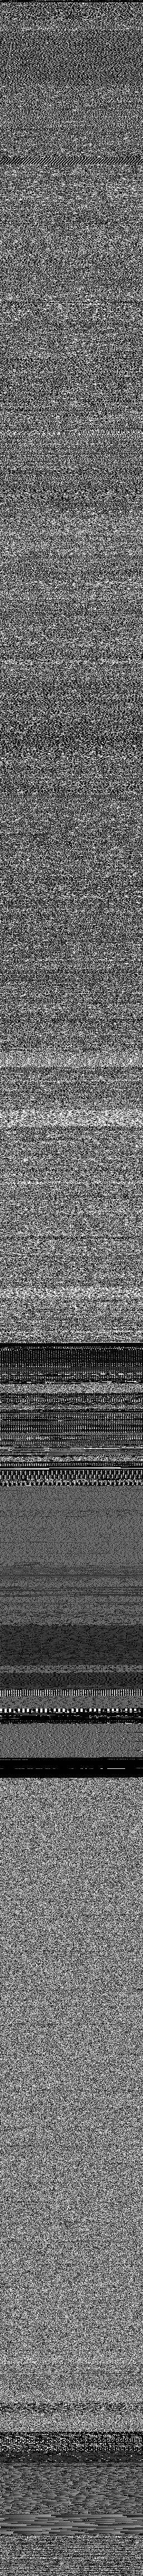

In [ ]:
from IPython.display import Image
Image(filename='putty.png') 

In [ ]:
!wget https://www.dropbox.com/s/ep8qjakfwh1rzk4/malimg_dataset.zip?dl=0 -O malimg_dataset.zip
!unzip -q malimg_dataset.zip

--2021-09-04 04:07:26--  https://www.dropbox.com/s/ep8qjakfwh1rzk4/malimg_dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ep8qjakfwh1rzk4/malimg_dataset.zip [following]
--2021-09-04 04:07:26--  https://www.dropbox.com/s/raw/ep8qjakfwh1rzk4/malimg_dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc060d3ba2ed3e8a22051f5cccfd.dl.dropboxusercontent.com/cd/0/inline/BVggdsuEwseMIN_85XHnhNHSbwY0uHymWk3uglaOoS4C5gRPNJpf2VFCTM9rTU0RKtNtCKoJBfxEvANAEtUY4-PkNIUTnbzxQOEbcPFPm6wVkMVHjRIA2CpAW7qdDV0f8_3o5tY0C0H7Ao1L8gwsB9ol/file# [following]
--2021-09-04 04:07:26--  https://uc060d3ba2ed3e8a22051f5cccfd.dl.dropboxusercontent.com/cd/0/inline/BVggdsuEwseMIN_85XHnhNHSbwY0uHymWk3uglaOoS4C5gRPNJpf2VFCTM9rTU0RKtN

In [ ]:
!ls -la ./malimg_paper_dataset_imgs

total 720
drwxr-xr-x 27 root root   4096 Oct 16  2013  .
drwxr-xr-x  1 root root   4096 Sep  4 04:07  ..
drwxr-xr-x  2 root root  12288 Oct 16  2013  Adialer.C
drwxr-xr-x  2 root root  12288 Oct 16  2013  Agent.FYI
drwxr-xr-x  2 root root 188416 Oct 16  2013  Allaple.A
drwxr-xr-x  2 root root 114688 Oct 16  2013  Allaple.L
drwxr-xr-x  2 root root  20480 Oct 16  2013 'Alueron.gen!J'
drwxr-xr-x  2 root root  12288 Oct 16  2013  Autorun.K
drwxr-xr-x  2 root root  20480 Oct 16  2013 'C2LOP.gen!g'
drwxr-xr-x  2 root root  12288 Oct 16  2013  C2LOP.P
drwxr-xr-x  2 root root  16384 Oct 16  2013  Dialplatform.B
drwxr-xr-x  2 root root  12288 Oct 16  2013  Dontovo.A
drwxr-xr-x  2 root root  32768 Oct 16  2013  Fakerean
drwxr-xr-x  2 root root  36864 Oct 16  2013  Instantaccess
drwxr-xr-x  2 root root  20480 Oct 16  2013  Lolyda.AA1
drwxr-xr-x  2 root root  16384 Oct 16  2013  Lolyda.AA2
drwxr-xr-x  2 root root  12288 Oct 16  2013  Lolyda.AA3
drwxr-xr-x  2 root root  12288 Oct 16  2013  Lolyda.A

In [ ]:
import numpy as np
import os
from keras.utils.np_utils import to_categorical
from PIL import Image
from sklearn.model_selection import train_test_split

dimen = 32
dir_path = "./malimg_paper_dataset_imgs/"
sub_dir_list = [name for name in os.listdir(dir_path) \
                if os.path.isdir(os.path.join(dir_path, name))]

In [ ]:
images = list()
labels = list()

for i in range(len(sub_dir_list)):
    label = i
    image_names = os.listdir(dir_path + sub_dir_list[i])
    for image_path in image_names:
        path = dir_path + sub_dir_list[i] + "/" + image_path
        image = Image.open(path).convert('L')
        resize_image = image.resize((dimen, dimen))
        array = list()
        for x in range(dimen):
            sub_array = list()
            for y in range(dimen):
                sub_array.append(resize_image.load()[x, y])
            array.append(sub_array)
        image_data = np.array(array)
        image = np.array(np.reshape(image_data, (dimen, dimen, 1))) / 255
        images.append(image)
        labels.append(label)

In [ ]:
X = np.array(images)
y = np.array(to_categorical(np.array(labels), num_classes=len(sub_dir_list)))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

input_shape = (32, 32, 1)
model = Sequential()
model.add(Conv2D(16, (3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.1, batch_size=32, epochs=10)

Epoch 1/10
211/211 [==============================] - 3s 11ms/step - loss: 2.0744 - accuracy: 0.4016 - val_loss: 1.3128 - val_accuracy: 0.5628
Epoch 2/10
211/211 [==============================] - 2s 10ms/step - loss: 1.0648 - accuracy: 0.7030 - val_loss: 0.5289 - val_accuracy: 0.8703
Epoch 3/10
211/211 [==============================] - 2s 11ms/step - loss: 0.6341 - accuracy: 0.8301 - val_loss: 0.3265 - val_accuracy: 0.8997
Epoch 4/10
211/211 [==============================] - 2s 11ms/step - loss: 0.4699 - accuracy: 0.8657 - val_loss: 0.2435 - val_accuracy: 0.9118
Epoch 5/10
211/211 [==============================] - 2s 11ms/step - loss: 0.3963 - accuracy: 0.8828 - val_loss: 0.2143 - val_accuracy: 0.9184
Epoch 6/10
211/211 [==============================] - 2s 11ms/step - loss: 0.3287 - accuracy: 0.9014 - val_loss: 0.1836 - val_accuracy: 0.9225
Epoch 7/10
211/211 [==============================] - 2s 11ms/step - loss: 0.3024 - accuracy: 0.9067 - val_loss: 0.1884 - val_accuracy: 0.9318

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('The accuracy of the test is: {:.3f} %'.format(score[1]*100))

The accuracy of the test is: 95.021 %
